In [1]:
PATH  = "/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data"
DATA_PATH  = "/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data"

In [2]:
import os
import numpy as np
import pandas as pd
from glob import glob
#from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
AP_Exam_Data = pd.read_excel("/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data/AP Scores/2019 AP Scores Student Roster File_BAIN.xlsx")
ACT_Score_data = pd.read_excel("/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data/ACT Scores/Metro Atlanta ACT Test Scores 3-12-2020_BAIN.xlsx")
print (AP_Exam_Data.keys(), ACT_Score_data.keys())

Index(['AP Number / AP ID', 'Subject', 'Score', 'Discipline', 'Grade Level',
       'Student ID', 'Attending School Name', 'Attending School AI Code',
       'Instructed at this School?', 'Section Name', 'Teacher'],
      dtype='object') Index(['region_name', 'school_id', 'school_name', 'Cohort',
       'salesforce_student_id', 'local_student_id', 'Full_Name__c',
       'n_tests_taken', 'max_act_score', 'test_id', 'ACT_Composite__c',
       'ACT_English__c', 'ACT_Math__c', 'ACT_Reading__c', 'ACT_Science__c',
       'is_best_score', 'test_order', 'date_taken'],
      dtype='object')


In [4]:
!pip install xlrd


You should consider upgrading via the '/usr/local/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [8]:
AP_Exam_Data.head()

,AP Number / AP ID,Subject,Score,Discipline,Grade Level,Student ID,Attending School Name,Attending School AI Code,Instructed at this School?,Section Name,Teacher
0,99010533,United States History,1,History and Social Sciences,11th Grade,1058707.0,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned
1,99013991,Human Geography,1,History and Social Sciences,9th Grade,2006614.0,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned
2,99017147,English Language and Composition,2,English,11th Grade,2086552.0,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned
3,99017147,Spanish Language and Culture,1,World Languages,11th Grade,2086552.0,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned
4,99017147,United States History,2,History and Social Sciences,11th Grade,2086552.0,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned


In [9]:
ACT_Score_data.head()

,region_name,school_id,school_name,Cohort,salesforce_student_id,local_student_id,Full_Name__c,n_tests_taken,max_act_score,test_id,ACT_Composite__c,ACT_English__c,ACT_Math__c,ACT_Reading__c,ACT_Science__c,is_best_score,test_order,date_taken
0,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2022,0033c00002Rcb2NAAR,2099653,NaN,1,14,a0B3c00000iKECLEA4,14,15,12,14.0,14.0,1,1,2019-04-15
1,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C000001mmOWZIA2,1048664,NaN,1,11,a0B3c00000iJzXsEAK,11,9,11,12.0,13.0,1,1,2019-04-15
2,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C00000205x1yIAA,1041213,NaN,1,15,a0B3c00000iIU59EAG,15,16,14,13.0,16.0,1,1,2019-04-15
3,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C00000205x57IAA,1067942,NaN,1,16,a0B3c00000iIU6EEAW,16,18,14,15.0,15.0,1,1,2019-04-15
4,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C00000205x5MIAQ,1065435,NaN,1,14,a0B3c00000iIU6IEAW,14,12,14,11.0,17.0,1,1,2019-04-15


In [10]:
ACT_Score_data.T.apply(lambda x: x.nunique(), axis=1)

region_name                 1
school_id                   1
school_name                 1
Cohort                      8
salesforce_student_id     766
local_student_id          766
Full_Name__c                0
n_tests_taken               8
max_act_score              23
test_id                  1922
ACT_Composite__c           26
ACT_English__c             31
ACT_Math__c                27
ACT_Reading__c             30
ACT_Science__c             29
is_best_score               2
test_order                  8
date_taken                 66
dtype: int64

In [11]:
AP_Exam_Data.T.apply(lambda x: x.nunique(), axis=1)

AP Number / AP ID             474
Subject                        14
Score                           4
Discipline                      6
Grade Level                     5
Student ID                    455
Attending School Name           1
Attending School AI Code        1
Instructed at this School?      2
Section Name                    2
Teacher                         1
dtype: int64

In [12]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [13]:
print(df[2:4])

   one  two
c  3.0    3
d  NaN    4


In [14]:
Demographic_Data = pd.read_csv(DATA_PATH + "/Student Demographic and Enrollment/Student Demographic FY05 to FY20 - APS Schools.csv")
High_School_Demographic_Data = Demographic_Data[pd.to_numeric(Demographic_Data['student.grade'], errors='coerce') > 8].drop_duplicates(subset=['student.studentNumber', 'student.stateID'], keep='last').reset_index(drop=True)
display (High_School_Demographic_Data)

,student.studentNumber,student.stateID,student.gender,student.grade,student.birthdate,student.hispanicEthnicity,student.raceEthnicityFed,histEnrollment.specialEdStatus,histEnrollment.lep
0,2013142,3.563124e+09,F,10,5/7/2004,N,4.0,N,N
1,2002619,9.270614e+09,M,11,10/11/1998,N,4.0,Y,N
2,2006614,5.100820e+09,M,10,3/19/2004,N,4.0,N,N
3,1057041,9.880258e+09,F,11,1/7/2000,N,4.0,N,N
4,2030809,6.099306e+09,M,10,10/25/1997,N,4.0,N,N
...,...,...,...,...,...,...,...,...,...
2093,2111769,8.715645e+09,M,9,2/22/2003,N,4.0,N,N
2094,151322,9.817695e+09,M,12,9/18/1995,N,4.0,N,N
2095,2023190,5.527619e+09,F,9,3/26/2004,N,4.0,N,N
2096,95519,5.393548e+09,F,10,12/7/1996,N,4.0,N,N


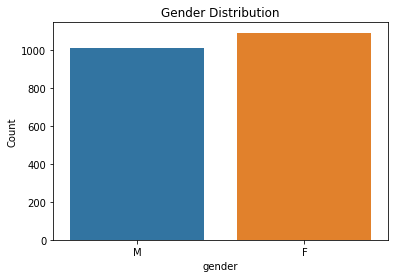

In [15]:

f, ax = plt.subplots()
figure = sns.countplot(x = 'student.gender', data=High_School_Demographic_Data, order=['M','F'])
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')
plt.savefig('gender.png', bbox_inches='tight')

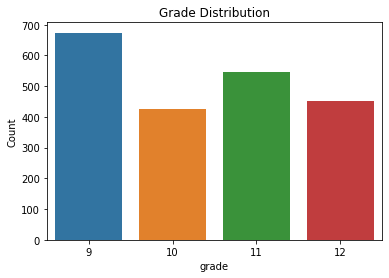

In [16]:

f, ax = plt.subplots()
figure = sns.countplot(x = 'student.grade', data=High_School_Demographic_Data, order=['9','10','11','12'])
ax = ax.set(ylabel="Count", xlabel="grade")
figure.grid(False)
plt.title('Grade Distribution')
plt.savefig('grade.png', bbox_inches='tight')

In [17]:
    import pandas as pd
    from datetime import datetime
    from datetime import date

    d = {'col0': [1, 2, 6], 
         'col1': [3, 8, 3], 
         'col2': ['17.02.1979', '11.11.1993', '01.08.1961']}

    df = pd.DataFrame(data=High_School_Demographic_Data)

    def calculate_age(born):
        born = datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

    df['age'] = df['student.birthdate'].apply(calculate_age)
    print(df)

      student.studentNumber  student.stateID student.gender student.grade  \
0                   2013142     3.563124e+09              F            10   
1                   2002619     9.270614e+09              M            11   
2                   2006614     5.100820e+09              M            10   
3                   1057041     9.880258e+09              F            11   
4                   2030809     6.099306e+09              M            10   
...                     ...              ...            ...           ...   
2093                2111769     8.715645e+09              M             9   
2094                 151322     9.817695e+09              M            12   
2095                2023190     5.527619e+09              F             9   
2096                  95519     5.393548e+09              F            10   
2097                1041618     6.133699e+09              F            11   

     student.birthdate student.hispanicEthnicity  student.raceEthnicityFed 

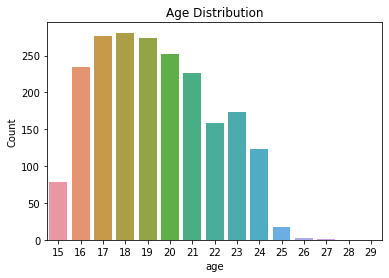

In [18]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'age', data=df, order=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
ax = ax.set(ylabel="Count", xlabel="age")
figure.grid(False)
plt.title('Age Distribution')
plt.savefig('age_plot.png', bbox_inches='tight')

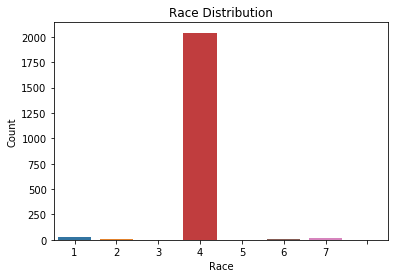

In [19]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'student.raceEthnicityFed', data=df, order=[1,2,3,4,5,6,7,''])
ax = ax.set(ylabel="Count", xlabel="Race")
figure.grid(False)
plt.title('Race Distribution')
plt.savefig('race_plot.png', bbox_inches='tight')

In [20]:
Enrollment_Data = pd.read_csv(DATA_PATH + "/Student Demographic and Enrollment/Student Enrollment FY05 to FY20 - APS Schools.csv").set_index('student.studentNumber')#rename(columns={'student.studentNumber':'student_id'}).set_index('student_id')
Enrollment_Data = Enrollment_Data.groupby(level="student.studentNumber").count()
Enrollment_Data = Enrollment_Data.rename(columns={'histEnrollment.grade':'Years_Enrolled'})[['Years_Enrolled']]
display (Enrollment_Data)

,Years_Enrolled
student.studentNumber,
85237,2
85351,3
85394,2
86554,1
86576,2
...,...
2123472,2
2123494,1
2123585,2


In [21]:
Master_Data = df.merge(Enrollment_Data, on='student.studentNumber',how='left').set_index('student.studentNumber')
display (Master_Data)
print (Master_Data['Years_Enrolled'].isna().sum())


,student.stateID,student.gender,student.grade,student.birthdate,student.hispanicEthnicity,student.raceEthnicityFed,histEnrollment.specialEdStatus,histEnrollment.lep,age,Years_Enrolled
student.studentNumber,,,,,,,,,,
2013142,3.563124e+09,F,10,5/7/2004,N,4.0,N,N,16,7
2002619,9.270614e+09,M,11,10/11/1998,N,4.0,Y,N,22,4
2006614,5.100820e+09,M,10,3/19/2004,N,4.0,N,N,17,5
1057041,9.880258e+09,F,11,1/7/2000,N,4.0,N,N,21,7
2030809,6.099306e+09,M,10,10/25/1997,N,4.0,N,N,23,2
...,...,...,...,...,...,...,...,...,...,...
2111769,8.715645e+09,M,9,2/22/2003,N,4.0,N,N,18,2
151322,9.817695e+09,M,12,9/18/1995,N,4.0,N,N,25,9
2023190,5.527619e+09,F,9,3/26/2004,N,4.0,N,N,17,5


0


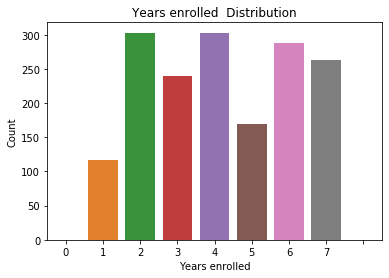

In [22]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'Years_Enrolled', data = Master_Data, order=[0,1,2,3,4,5,6,7,''])
ax = ax.set(ylabel="Count", xlabel="Years enrolled")
figure.grid(False)
plt.title('Years enrolled  Distribution')
plt.savefig('years_enrolled_plot.png', bbox_inches='tight')

In [23]:
ACT_Score_data = pd.read_excel(DATA_PATH + "/ACT Scores/Metro Atlanta ACT Test Scores 3-12-2020_BAIN.xlsx")
ACT_Score_data = ACT_Score_data.drop_duplicates(subset=['local_student_id'], keep='last').rename(columns={'local_student_id': 'ID'})
display (ACT_Score_data)

,region_name,school_id,school_name,Cohort,salesforce_student_id,ID,Full_Name__c,n_tests_taken,max_act_score,test_id,ACT_Composite__c,ACT_English__c,ACT_Math__c,ACT_Reading__c,ACT_Science__c,is_best_score,test_order,date_taken
0,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2022,0033c00002Rcb2NAAR,2099653,NaN,1,14,a0B3c00000iKECLEA4,14,15,12,14.0,14.0,1,1,2019-04-15
1,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C000001mmOWZIA2,1048664,NaN,1,11,a0B3c00000iJzXsEAK,11,9,11,12.0,13.0,1,1,2019-04-15
2,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C00000205x1yIAA,1041213,NaN,1,15,a0B3c00000iIU59EAG,15,16,14,13.0,16.0,1,1,2019-04-15
3,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C00000205x57IAA,1067942,NaN,1,16,a0B3c00000iIU6EEAW,16,18,14,15.0,15.0,1,1,2019-04-15
4,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2021,003C00000205x5MIAQ,1065435,NaN,1,14,a0B3c00000iIU6IEAW,14,12,14,11.0,17.0,1,1,2019-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2015,003C000001PI5EBIA1,1058339,NaN,2,14,a0BC000000Z1it5MAB,14,11,15,15.0,14.0,0,2,2014-09-01
1955,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2015,003C000001PI5ECIA1,166372,NaN,3,17,a0BC000000Z1it7MAB,17,15,18,17.0,19.0,1,3,2014-12-01
1957,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2015,003C000001PI5EEIA1,139400,NaN,2,16,a0BC000000Z1it8MAB,16,15,15,14.0,18.0,0,2,2014-09-01
1959,KIPP Metro Atlanta Schools,133,KIPP Atlanta Collegiate,2015,003C000001PI5EFIA1,2041683,NaN,2,16,a0BC000000Z1it9MAB,14,13,16,15.0,13.0,0,2,2014-09-01


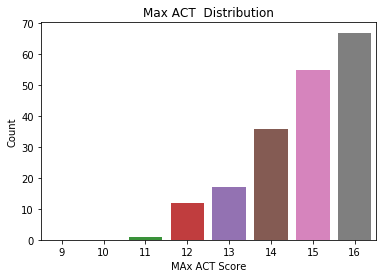

In [24]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'max_act_score', data = ACT_Score_data, order=[9,10,11,12,13,14,15,16])
ax = ax.set(ylabel="Count", xlabel="MAx ACT Score")
figure.grid(False)
plt.title('Max ACT  Distribution')
plt.savefig('AMx ACT_score_plot.png', bbox_inches='tight')

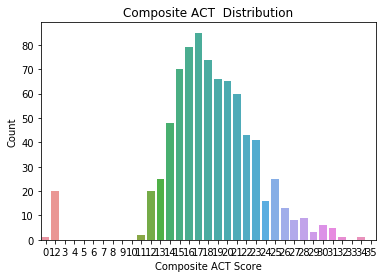

In [25]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_Composite__c', data = ACT_Score_data, order=[0,12,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
ax = ax.set(ylabel="Count", xlabel="Composite ACT Score")
figure.grid(False)
plt.title('Composite ACT  Distribution')
plt.savefig('Composite ACT_score_plot.png', bbox_inches='tight')

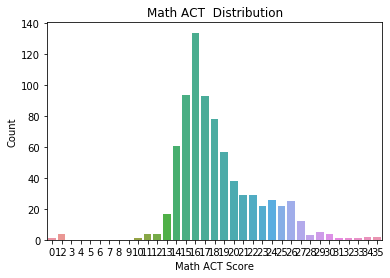

In [26]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_Math__c', data = ACT_Score_data, order=[0,12,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
ax = ax.set(ylabel="Count", xlabel="Math ACT Score")
figure.grid(False)
plt.title('Math ACT  Distribution')
plt.savefig('Math ACT_score_plot.png', bbox_inches='tight')

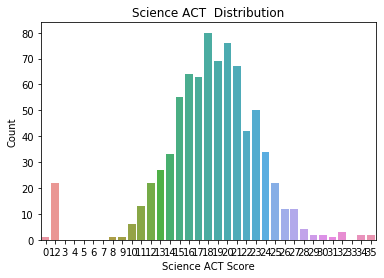

In [27]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_Science__c', data = ACT_Score_data, order=[0,12,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
ax = ax.set(ylabel="Count", xlabel="Science ACT Score")
figure.grid(False)
plt.title('Science ACT  Distribution')
plt.savefig('Science ACT_score_plot.png', bbox_inches='tight')

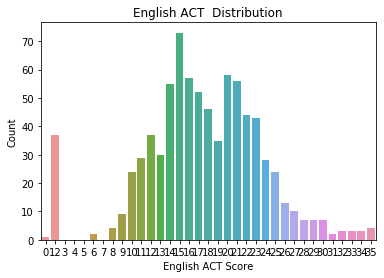

In [28]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_English__c', data = ACT_Score_data, order=[0,12,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
ax = ax.set(ylabel="Count", xlabel="English ACT Score")
figure.grid(False)
plt.title('English ACT  Distribution')
plt.savefig('English ACT_score_plot.png', bbox_inches='tight')

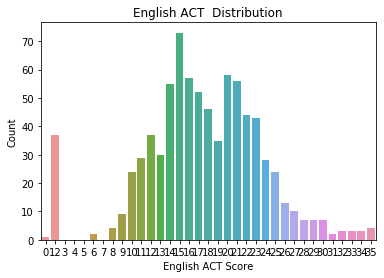

In [29]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_English__c', data = ACT_Score_data, order=[0,12,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
ax = ax.set(ylabel="Count", xlabel="English ACT Score")
figure.grid(False)
plt.title('English ACT  Distribution')
plt.savefig('English ACT_score_plot.png', bbox_inches='tight')

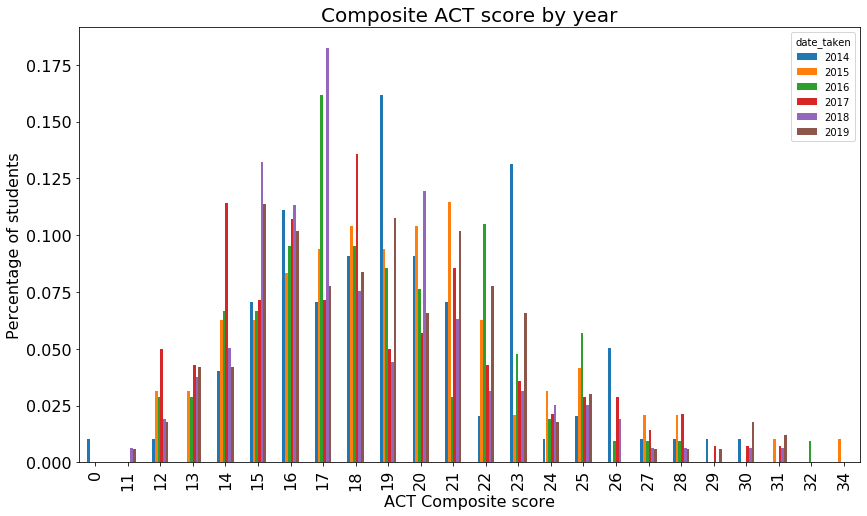

<Figure size 432x288 with 0 Axes>

In [30]:
perc = (lambda col: col/col.sum())
index = [2013,2014,2015,2016,2017,2018,2019]
act_1 = pd.crosstab(index=ACT_Score_data.ACT_Composite__c, columns=ACT_Score_data.date_taken.dt.year)
act_2 = perc(act_1)
act_2.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Composite ACT score by year', fontsize=20)
plt.ylabel('Percentage of students', fontsize=16)
plt.xlabel('ACT Composite score', fontsize=16)
plt.show()
plt.savefig('Grade_ACT_Composite__c.png', bbox_inches='tight')

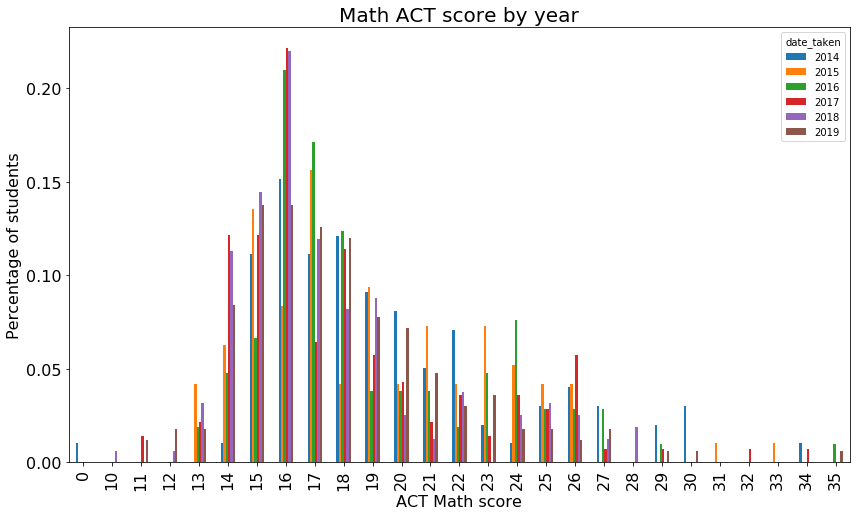

<Figure size 432x288 with 0 Axes>

In [31]:
index = [2013,2014,2015,2016,2017,2018,2019]
act_1 = pd.crosstab(index=ACT_Score_data.ACT_Math__c, columns=ACT_Score_data.date_taken.dt.year)
act_2 = perc(act_1)
act_2.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Math ACT score by year', fontsize=20)
plt.ylabel('Percentage of students', fontsize=16)
plt.xlabel('ACT Math score', fontsize=16)
plt.show()
plt.savefig('Grade_ACT_Math__c.png', bbox_inches='tight')

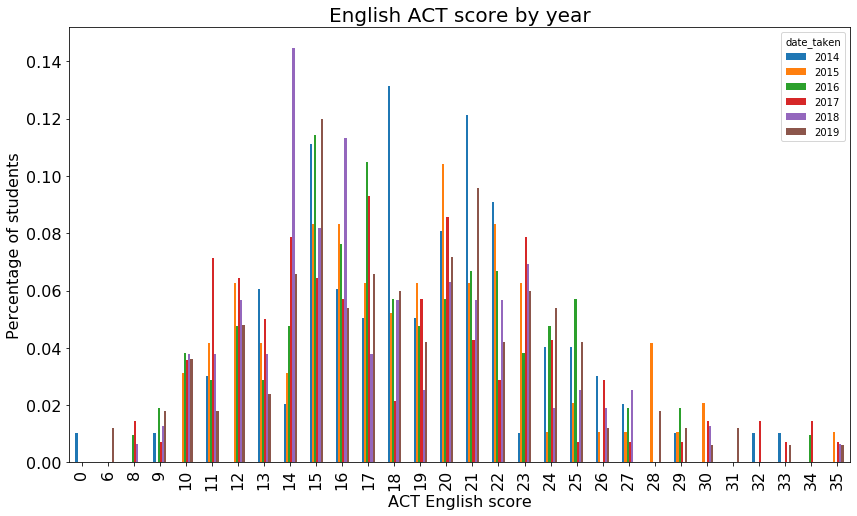

<Figure size 432x288 with 0 Axes>

In [32]:
index = [2013,2014,2015,2016,2017,2018,2019]
act_1 = pd.crosstab(index=ACT_Score_data.ACT_English__c,columns=ACT_Score_data.date_taken.dt.year)
act_2 = perc(act_1)
act_2.plot.bar(fontsize=16, figsize=(14,8))
plt.title('English ACT score by year', fontsize=20)
plt.ylabel('Percentage of students', fontsize=16)
plt.xlabel('ACT English score', fontsize=16)
plt.show()
plt.savefig('Grade_ACT_English__c.png', bbox_inches='tight')

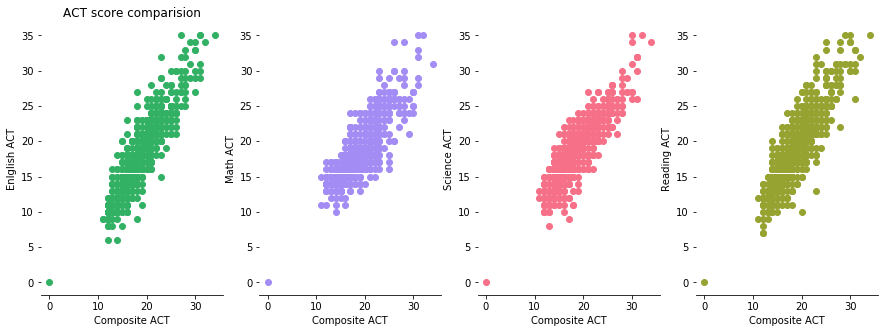

In [33]:
sat_color = "#32b165"
act_color = "#a38cf4"
reg_color = '#f67088'
reg2_color = '#96a331'
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=4, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]

ax.set_title('ACT score comparision');
ax.scatter(ACT_Score_data.ACT_Composite__c, ACT_Score_data.ACT_English__c, color=sat_color);

ax.set_xlabel('Composite ACT');
ax.set_ylabel('Enlglish ACT');
#ax.legend();
ax=axes[1]
ax.scatter(ACT_Score_data.ACT_Composite__c, ACT_Score_data.ACT_Math__c, color=act_color)
ax.set_xlabel('Composite ACT');
ax.set_ylabel('Math ACT');
#ax.legend();
ax=axes[2]
ax.scatter(ACT_Score_data.ACT_Composite__c, ACT_Score_data.ACT_Science__c, color=reg_color)
ax.set_xlabel('Composite ACT');
ax.set_ylabel('Science ACT');
#ax.legend();
ax=axes[3]
ax.scatter(ACT_Score_data.ACT_Composite__c, ACT_Score_data.ACT_Reading__c, color=reg2_color)
ax.set_xlabel('Composite ACT');
ax.set_ylabel('Reading ACT');
#ax.legend();



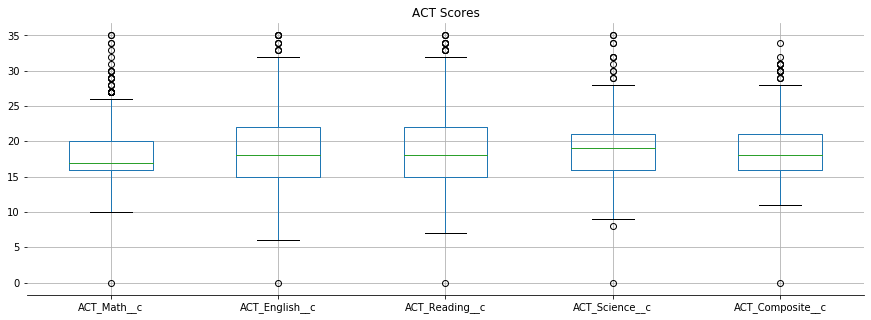

In [34]:
ACT_scores = ["ACT_Math__c", "ACT_English__c", "ACT_Reading__c", "ACT_Science__c", "ACT_Composite__c"]
#SAT_scores = ["Math_SAT", "EBRW_SAT"]
#participation_rates = ["Participation_SAT", "Participation_ACT"]

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=1, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

#ax=axes[0]
#ax.set_title("SAT Scores")
#df.boxplot(SAT_scores, ax=ax)

#ax=axes[1]
axes.set_title("ACT Scores")
ACT_Score_data.boxplot(ACT_scores, ax=axes);

In [35]:
df1 = ACT_Score_data[["salesforce_student_id","ID","ACT_Math__c", "ACT_English__c", "ACT_Reading__c", "ACT_Science__c", "ACT_Composite__c", "date_taken"]].rename(columns={'ID' : 'student.studentNumber'})

In [36]:
display(df1)

,salesforce_student_id,student.studentNumber,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken
0,0033c00002Rcb2NAAR,2099653,12,15,14.0,14.0,14,2019-04-15
1,003C000001mmOWZIA2,1048664,11,9,12.0,13.0,11,2019-04-15
2,003C00000205x1yIAA,1041213,14,16,13.0,16.0,15,2019-04-15
3,003C00000205x57IAA,1067942,14,18,15.0,15.0,16,2019-04-15
4,003C00000205x5MIAQ,1065435,14,12,11.0,17.0,14,2019-04-15
...,...,...,...,...,...,...,...,...
1952,003C000001PI5EBIA1,1058339,15,11,15.0,14.0,14,2014-09-01
1955,003C000001PI5ECIA1,166372,18,15,17.0,19.0,17,2014-12-01
1957,003C000001PI5EEIA1,139400,15,15,14.0,18.0,16,2014-09-01
1959,003C000001PI5EFIA1,2041683,16,13,15.0,13.0,14,2014-09-01


In [37]:
df1.describe

<bound method NDFrame.describe of      salesforce_student_id  student.studentNumber  ACT_Math__c  \
0       0033c00002Rcb2NAAR                2099653           12   
1       003C000001mmOWZIA2                1048664           11   
2       003C00000205x1yIAA                1041213           14   
3       003C00000205x57IAA                1067942           14   
4       003C00000205x5MIAQ                1065435           14   
...                    ...                    ...          ...   
1952    003C000001PI5EBIA1                1058339           15   
1955    003C000001PI5ECIA1                 166372           18   
1957    003C000001PI5EEIA1                 139400           15   
1959    003C000001PI5EFIA1                2041683           16   
1962    003C000001PI5EGIA1                2030916           29   

      ACT_English__c  ACT_Reading__c  ACT_Science__c  ACT_Composite__c  \
0                 15            14.0            14.0                14   
1                  9     

In [38]:
display (Master_Data)

,student.stateID,student.gender,student.grade,student.birthdate,student.hispanicEthnicity,student.raceEthnicityFed,histEnrollment.specialEdStatus,histEnrollment.lep,age,Years_Enrolled
student.studentNumber,,,,,,,,,,
2013142,3.563124e+09,F,10,5/7/2004,N,4.0,N,N,16,7
2002619,9.270614e+09,M,11,10/11/1998,N,4.0,Y,N,22,4
2006614,5.100820e+09,M,10,3/19/2004,N,4.0,N,N,17,5
1057041,9.880258e+09,F,11,1/7/2000,N,4.0,N,N,21,7
2030809,6.099306e+09,M,10,10/25/1997,N,4.0,N,N,23,2
...,...,...,...,...,...,...,...,...,...,...
2111769,8.715645e+09,M,9,2/22/2003,N,4.0,N,N,18,2
151322,9.817695e+09,M,12,9/18/1995,N,4.0,N,N,25,9
2023190,5.527619e+09,F,9,3/26/2004,N,4.0,N,N,17,5


# Combine ACT and Demograpic Data 

In [39]:
Master_df = Master_Data.merge(df1, on='student.studentNumber', how='left')
display(Master_df)

,student.studentNumber,student.stateID,student.gender,student.grade,student.birthdate,student.hispanicEthnicity,student.raceEthnicityFed,histEnrollment.specialEdStatus,histEnrollment.lep,age,Years_Enrolled,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken
0,2013142,3.563124e+09,F,10,5/7/2004,N,4.0,N,N,16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2002619,9.270614e+09,M,11,10/11/1998,N,4.0,Y,N,22,4,003C000001mmOZIIA2,15.0,16.0,18.0,19.0,17.0,2015-09-01
2,2006614,5.100820e+09,M,10,3/19/2004,N,4.0,N,N,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1057041,9.880258e+09,F,11,1/7/2000,N,4.0,N,N,21,7,003C000001TDe5BIAT,15.0,17.0,14.0,12.0,15.0,2017-09-01
4,2030809,6.099306e+09,M,10,10/25/1997,N,4.0,N,N,23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2111769,8.715645e+09,M,9,2/22/2003,N,4.0,N,N,18,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2094,151322,9.817695e+09,M,12,9/18/1995,N,4.0,N,N,25,9,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2095,2023190,5.527619e+09,F,9,3/26/2004,N,4.0,N,N,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2096,95519,5.393548e+09,F,10,12/7/1996,N,4.0,N,N,24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [40]:
print (Master_df['date_taken'].isna().sum())


1343


# Adding a new variable to identify if the student has taken the ACT

In [41]:
Master_df['ACT_taken'] = Master_df.isna().sum(axis=1).apply(lambda x: 'Y' if x==0 else 'N')

In [42]:
display(Master_df)

,student.studentNumber,student.stateID,student.gender,student.grade,student.birthdate,student.hispanicEthnicity,student.raceEthnicityFed,histEnrollment.specialEdStatus,histEnrollment.lep,age,Years_Enrolled,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken
0,2013142,3.563124e+09,F,10,5/7/2004,N,4.0,N,N,16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N
1,2002619,9.270614e+09,M,11,10/11/1998,N,4.0,Y,N,22,4,003C000001mmOZIIA2,15.0,16.0,18.0,19.0,17.0,2015-09-01,Y
2,2006614,5.100820e+09,M,10,3/19/2004,N,4.0,N,N,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N
3,1057041,9.880258e+09,F,11,1/7/2000,N,4.0,N,N,21,7,003C000001TDe5BIAT,15.0,17.0,14.0,12.0,15.0,2017-09-01,Y
4,2030809,6.099306e+09,M,10,10/25/1997,N,4.0,N,N,23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2111769,8.715645e+09,M,9,2/22/2003,N,4.0,N,N,18,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N
2094,151322,9.817695e+09,M,12,9/18/1995,N,4.0,N,N,25,9,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N
2095,2023190,5.527619e+09,F,9,3/26/2004,N,4.0,N,N,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N
2096,95519,5.393548e+09,F,10,12/7/1996,N,4.0,N,N,24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N


# Plot for total high school students who have taken ACT 

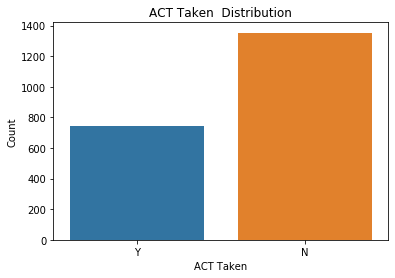

In [43]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_taken', data = Master_df, order=['Y','N'])
ax = ax.set(ylabel="Count", xlabel="ACT Taken")
figure.grid(False)
plt.title('ACT Taken  Distribution')
plt.savefig('act_taken_plot.png', bbox_inches='tight')

# Distribution of high school school student who have taken CAT and number of years they spent at KIPP 

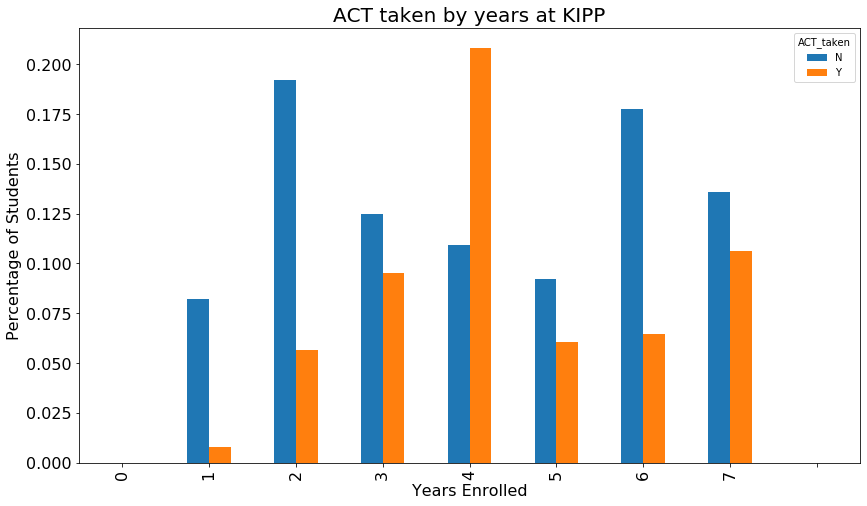

In [44]:
index = [0,1,2,3,4,5,6,7,'']
relationship_index = pd.crosstab(index=Master_df.Years_Enrolled, columns=Master_df.ACT_taken)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('ACT taken by years at KIPP', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Years Enrolled', fontsize=16)
plt.savefig('ACT)taken_years_enrolled.png', bbox_inches='tight')
plt.show()

# Now we will classify ACT score as performance range for 5 classes, Failure, poor, satisfactory, good and excellent based on percentile of the student in each class, 
## We will sue compotite sct score to classify this, one standard deviation within mean is satisfactory
     ### Satisfactoty  between mean-1sd to mean+1sd 
     ### Good between mean+ 1sd to mean +2 sd    
    ###e xcellent greater than mean+2sd
    ### poor - between mean-1sd to mean-2sd 
    ### failure is less than mean-2sd

In [45]:
mu = np.mean(df1.ACT_Composite__c)
std = np.std(df1.ACT_Composite__c)

In [46]:
mu-2*std

10.685308461129942

In [47]:
def func(a_):
    if a_< mu-2*std:
        return 'Failure'
    elif a_< mu-std and a_>= mu - 2*std:
        return 'Poor'
    elif a_>= mu- std and a_<= mu + 1*std:
        return 'Satisfactory'
    elif a_> mu + std and a_<= mu + 2*std:
        return 'Good'
    elif a_> mu + 2*std:
        return "Excellent"
    else: 
        return 'Not taken'

Master_df['ACT_per'] = Master_df[['ACT_Composite__c']].apply(lambda x: func(x[0]), axis=1)

In [48]:
display(Master_df)

,student.studentNumber,student.stateID,student.gender,student.grade,student.birthdate,student.hispanicEthnicity,student.raceEthnicityFed,histEnrollment.specialEdStatus,histEnrollment.lep,age,Years_Enrolled,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per
0,2013142,3.563124e+09,F,10,5/7/2004,N,4.0,N,N,16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken
1,2002619,9.270614e+09,M,11,10/11/1998,N,4.0,Y,N,22,4,003C000001mmOZIIA2,15.0,16.0,18.0,19.0,17.0,2015-09-01,Y,Satisfactory
2,2006614,5.100820e+09,M,10,3/19/2004,N,4.0,N,N,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken
3,1057041,9.880258e+09,F,11,1/7/2000,N,4.0,N,N,21,7,003C000001TDe5BIAT,15.0,17.0,14.0,12.0,15.0,2017-09-01,Y,Satisfactory
4,2030809,6.099306e+09,M,10,10/25/1997,N,4.0,N,N,23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2111769,8.715645e+09,M,9,2/22/2003,N,4.0,N,N,18,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken
2094,151322,9.817695e+09,M,12,9/18/1995,N,4.0,N,N,25,9,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken
2095,2023190,5.527619e+09,F,9,3/26/2004,N,4.0,N,N,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken
2096,95519,5.393548e+09,F,10,12/7/1996,N,4.0,N,N,24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,N,Not taken


In [49]:
df1['ACT_per'] = df1[['ACT_Composite__c']].apply(lambda x: func(x[0]), axis=1)

In [50]:
display(df1)

,salesforce_student_id,student.studentNumber,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_per
0,0033c00002Rcb2NAAR,2099653,12,15,14.0,14.0,14,2019-04-15,Poor
1,003C000001mmOWZIA2,1048664,11,9,12.0,13.0,11,2019-04-15,Poor
2,003C00000205x1yIAA,1041213,14,16,13.0,16.0,15,2019-04-15,Satisfactory
3,003C00000205x57IAA,1067942,14,18,15.0,15.0,16,2019-04-15,Satisfactory
4,003C00000205x5MIAQ,1065435,14,12,11.0,17.0,14,2019-04-15,Poor
...,...,...,...,...,...,...,...,...,...
1952,003C000001PI5EBIA1,1058339,15,11,15.0,14.0,14,2014-09-01,Poor
1955,003C000001PI5ECIA1,166372,18,15,17.0,19.0,17,2014-12-01,Satisfactory
1957,003C000001PI5EEIA1,139400,15,15,14.0,18.0,16,2014-09-01,Satisfactory
1959,003C000001PI5EFIA1,2041683,16,13,15.0,13.0,14,2014-09-01,Poor


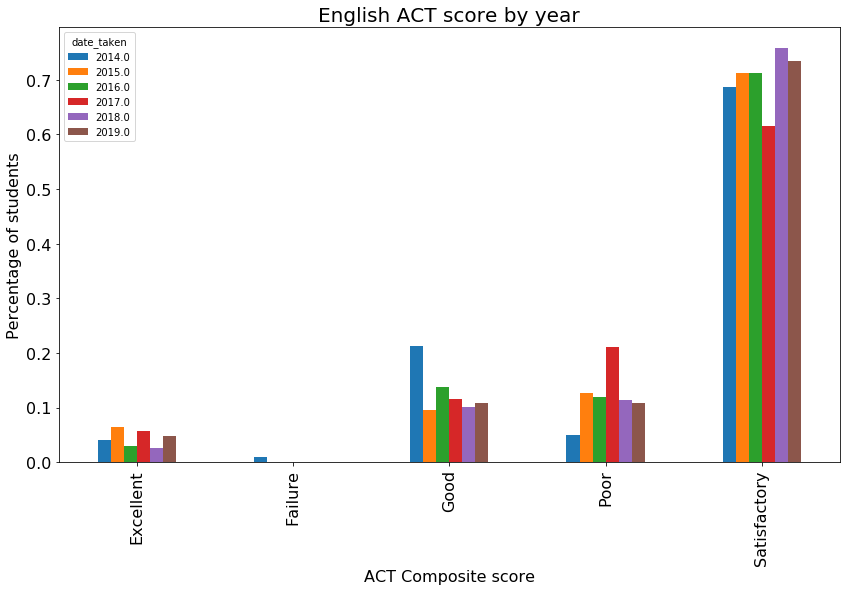

<Figure size 432x288 with 0 Axes>

In [51]:
index = ['Not taken','Failure','Poor', 'Satisfactory','Good','Excellent']
act_1 = pd.crosstab(index=Master_df.ACT_per,columns=Master_df.date_taken.dt.year)
act_2 = perc(act_1)
act_3 = act_1.apply(perc).reindex(index)
act_2.plot.bar(fontsize=16, figsize=(14,8))
plt.title('English ACT score by year', fontsize=20)
plt.ylabel('Percentage of students', fontsize=16)
plt.xlabel('ACT Composite score', fontsize=16)
plt.show()
plt.savefig('performance_act_year__c.png', bbox_inches='tight')

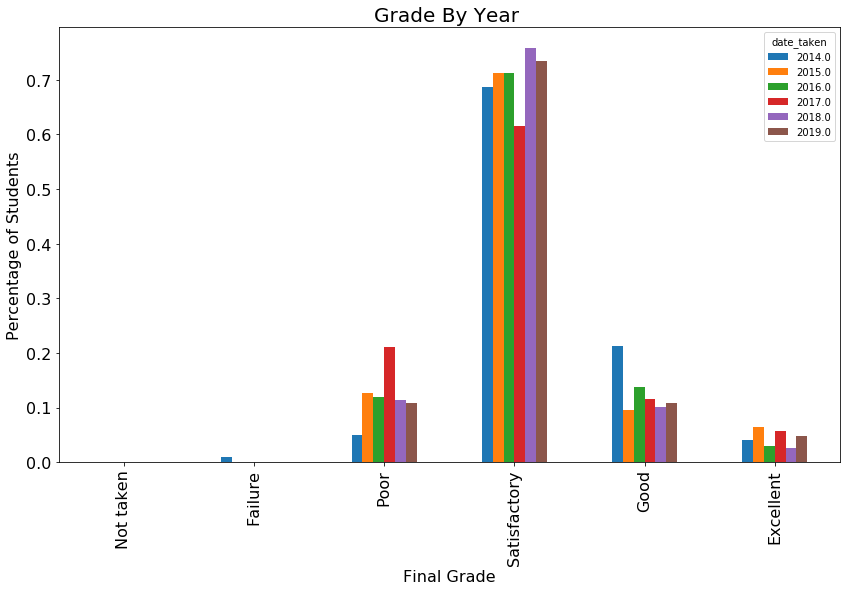

In [52]:
perc = (lambda col: col/col.sum())
index = ['Not taken','Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=Master_df.ACT_per, columns=Master_df.date_taken.dt.year)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Year ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_per_by_year.png', bbox_inches='tight')
plt.show()

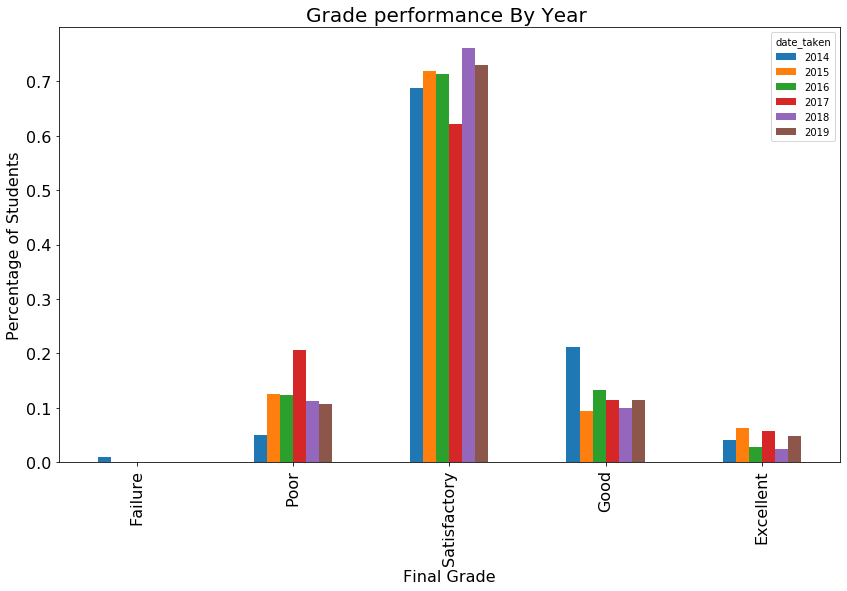

In [53]:
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=df1.ACT_per, columns=df1.date_taken.dt.year)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade performance By Year ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_performance_by_year.png', bbox_inches='tight')
plt.show()

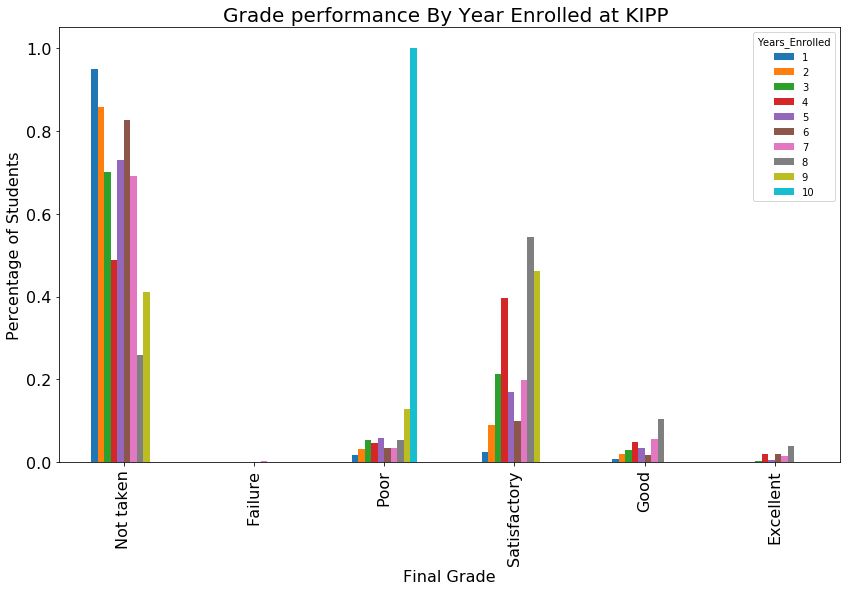

In [54]:
perc = (lambda col: col/col.sum())
index = ['Not taken','Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=Master_df.ACT_per, columns=Master_df.Years_Enrolled)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade performance By Year Enrolled at KIPP ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_performance_by_year_enrolled_kipp.png', bbox_inches='tight')
plt.show()

# Student success file processing 

In [55]:
Success_Data = pd.read_excel(DATA_PATH + "/Alumni Success/KTC enrollment data with SF ID.xlsx")
SFID_Crosswalk = pd.read_csv(DATA_PATH + "/ID Crosswalk.csv")
sf_df = Success_Data.merge(SFID_Crosswalk, on = 'Salesforce ID')
sf_df = sf_df.rename(columns={'State Student ID': 'student.stateID'})
#db_5 = db_5[db_5['Salesforce ID'].notna()]
display(sf_df)

,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,Enlisted in Military,Military Status,ID,student.stateID,Birth Date,Gender
0,003C000001YCaI8IAL,NaN,2017.0,Withdrawn,NaN,NaN,True,Enlisted,2000638,8.143664e+09,03-15-1999,F
1,003C000001mmOWHIA2,NaN,2019.0,Graduated,NaN,NaN,True,Enlisted,1067628,6.532967e+09,11-28-2000,F
2,003C000001mmOYUIA2,NaN,2019.0,Graduated,NaN,NaN,True,Enlisted,1049546,3.780031e+09,08-21-2001,M
3,003C000001mmOYZIA2,NaN,2019.0,Graduated,NaN,NaN,True,Enlisted,1050624,1.092284e+09,08-11-2001,F
4,003C000001mmObhIAE,NaN,2019.0,Graduated,NaN,NaN,True,Enlisted,1050225,5.537065e+09,07-07-2001,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2085178,NaN,05-06-2011,F
9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100301498,NaN,11-30-2002,M
9768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000097530,NaN,12-26-2008,F
9769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000007155,NaN,06-29-2006,F


In [56]:
display(Success_Data)

,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,Enlisted in Military,Military Status
0,003C0000018tX9rIAE,NaN,2014.0,Graduated,NaN,Atlanta Metropolitan State College,True,Enlisted
1,003C000001Ac5uuIAB,NaN,2015.0,Withdrawn,NaN,NaN,True,NaN
2,003C000001TDe7FIAT,NaN,2018.0,Attending,Georgia State University,NaN,True,NaN
3,003C000001TDe7FIAT,NaN,2018.0,Attending,Georgia State University,NaN,True,NaN
4,003C000001TDe7FIAT,NaN,2018.0,Attending,Georgia State University,NaN,True,NaN
...,...,...,...,...,...,...,...,...
1484,total number of students in ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1485,"Copyright (c) 2000-2020 salesforce.com, inc. A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1486,Confidential Information - Do Not Distribute,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1487,Generated By: Kelly Coffin 3/18/2020 1:45 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
display(SFID_Crosswalk)

,ID,State Student ID,Birth Date,Gender,Salesforce ID
0,2114390,1.001761e+09,07-22-2005,M,NaN
1,2119724,1.001824e+09,12-24-2008,M,NaN
2,2040063,1.003136e+09,11-16-2005,F,NaN
3,2021187,1.003402e+09,08-23-2005,F,NaN
4,2064042,1.007428e+09,02-28-2008,F,NaN
...,...,...,...,...,...
9609,2085178,NaN,05-06-2011,F,NaN
9610,1100301498,NaN,11-30-2002,M,NaN
9611,2000097530,NaN,12-26-2008,F,NaN
9612,2000007155,NaN,06-29-2006,F,NaN


In [58]:
sf_df1 = pd.merge(SFID_Crosswalk,Success_Data, on = 'Salesforce ID',how = 'inner')
display(sf_df1)

,ID,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,Enlisted in Military,Military Status
0,2114390,1.001761e+09,07-22-2005,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2119724,1.001824e+09,12-24-2008,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2040063,1.003136e+09,11-16-2005,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021187,1.003402e+09,08-23-2005,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2064042,1.007428e+09,02-28-2008,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9766,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN
9767,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN
9768,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN
9769,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN


In [59]:
sf_df1 = sf_df1[sf_df1['Salesforce ID'].notna()].rename(columns={'ID' : 'student.studentNumber'})

In [60]:
display(sf_df1)

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,Enlisted in Military,Military Status
8916,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,False,NaN
8917,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,False,NaN
8918,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,False,NaN
8919,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,False,NaN
8920,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9766,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN
9767,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN
9768,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN
9769,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,False,NaN


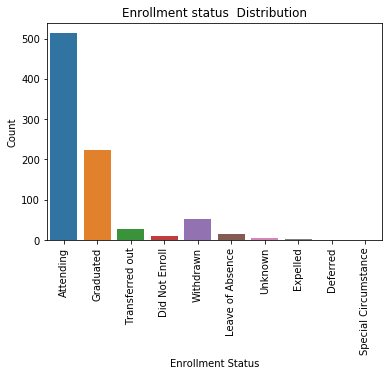

In [61]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'Enrollment: Status', data = sf_df1)
ax = ax.set(ylabel="Count", xlabel="Enrollment Status")
figure.grid(False)
figure.set_xticklabels(figure.get_xticklabels(), rotation=90)
plt.title('Enrollment status  Distribution')
plt.savefig('enrollment_status.png', bbox_inches='tight')

# Now we will merge this with master file and will create student success file with all demograpic data

In [62]:
Master_success_df = sf_df1.merge(Master_df, on='student.studentNumber', how='left')
display(Master_success_df)

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,Years_Enrolled,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
4,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,...,7,003C000001mmOWjIAM,18.0,23.0,19.0,19.0,20.0,2018-04-15,Y,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
851,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
852,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
853,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory


In [63]:
print (Master_success_df['date_taken'].isna().sum())

27


In [64]:
Master_success_df1 = Master_success_df[Master_success_df['date_taken'].notna()]

In [65]:
display(Master_success_df1)

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,Years_Enrolled,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
4,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,...,7,003C000001mmOWjIAM,18.0,23.0,19.0,19.0,20.0,2018-04-15,Y,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
851,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
852,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
853,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory


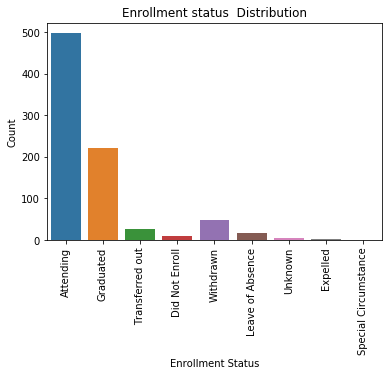

In [66]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'Enrollment: Status', data = Master_success_df1)
ax = ax.set(ylabel="Count", xlabel="Enrollment Status")
figure.grid(False)
figure.set_xticklabels(figure.get_xticklabels(), rotation=90)
plt.title('Enrollment status  Distribution')
plt.savefig('enrollment_status_cleaned.png', bbox_inches='tight')

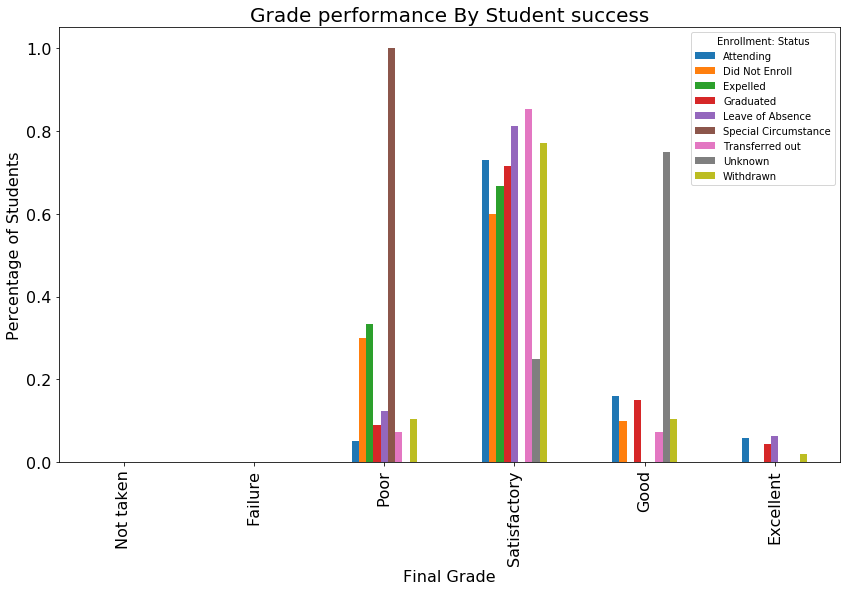

In [67]:
index = ['Not taken','Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=Master_success_df1.ACT_per, columns=Master_success_df1['Enrollment: Status'])
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade performance By Student success', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_performance_by_student.png', bbox_inches='tight')
plt.show()

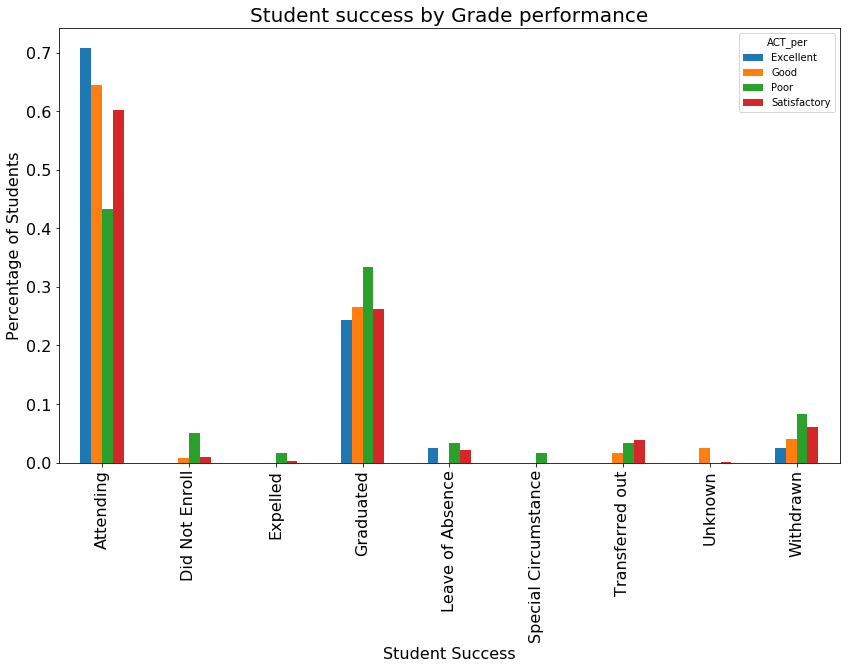

In [68]:
index = ['Attending','Did Not Enroll','Expelled','Graduated','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']
relationship_index = pd.crosstab(index=Master_success_df1['Enrollment: Status'], columns=Master_success_df1.ACT_per)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Student success by Grade performance', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Student Success', fontsize=16)
plt.savefig('Student_success_by_Grade.png', bbox_inches='tight')
plt.show()

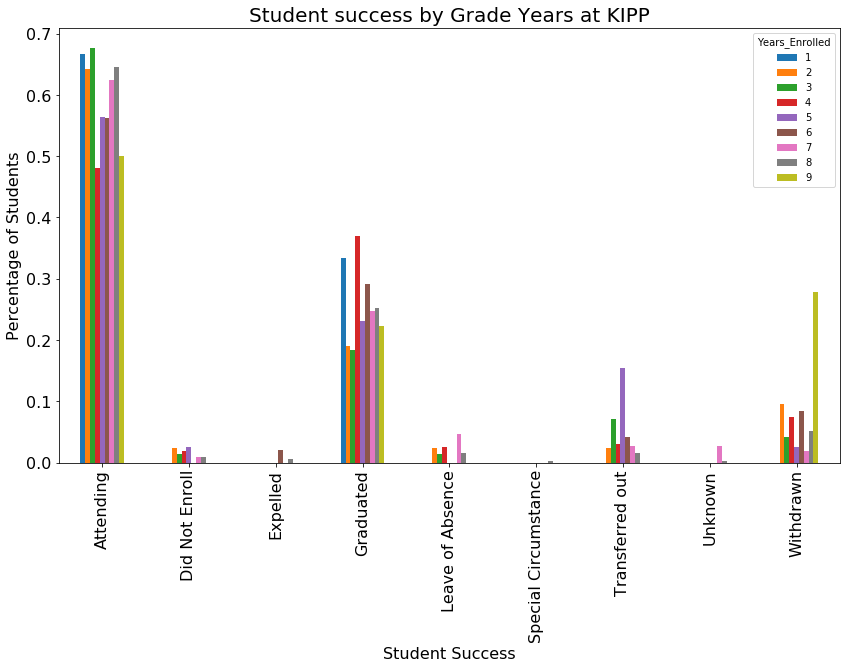

In [69]:
index = ['Attending','Did Not Enroll','Expelled','Graduated','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']
relationship_index = pd.crosstab(index=Master_success_df1['Enrollment: Status'], columns=Master_success_df1.Years_Enrolled)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Student success by Grade Years at KIPP', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Student Success', fontsize=16)
plt.savefig('Student_success_by_Years_at_KIPP.png', bbox_inches='tight')
plt.show()

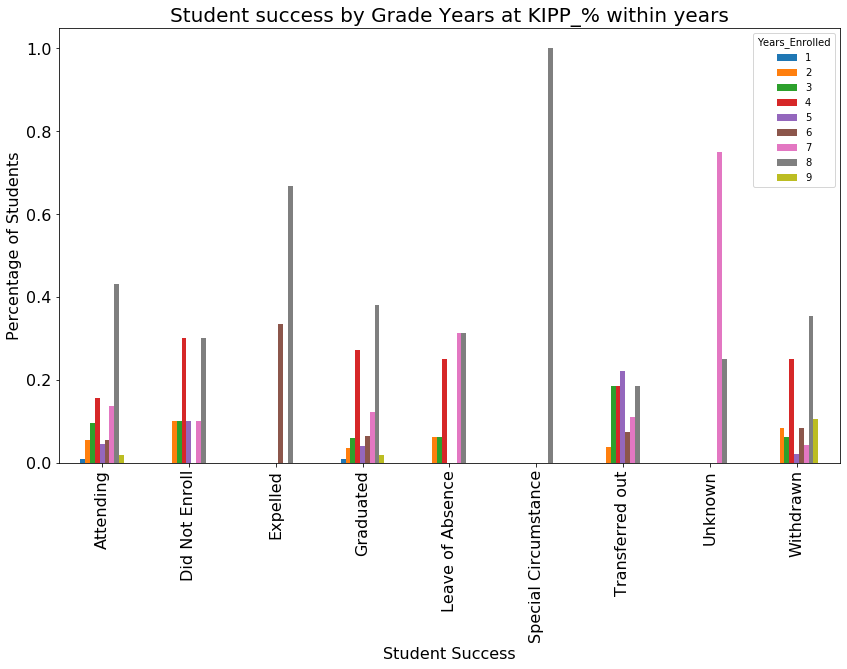

In [70]:
index = ['Attending','Did Not Enroll','Expelled','Graduated','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']
relationship_index = pd.crosstab(index=Master_success_df1['Enrollment: Status'], columns=Master_success_df1.Years_Enrolled)
romantic_index = relationship_index.apply(perc,axis = 1).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Student success by Grade Years at KIPP_% within years', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Student Success', fontsize=16)
plt.savefig('Student_success_by_Years_at_KIPP1.png', bbox_inches='tight')
plt.show()

# From above plot we can clearly observe that kids who have spent more years have better success rate.

# Below plot give percentage of total student by success status for students who have taken ACT and students who have not taken ACT

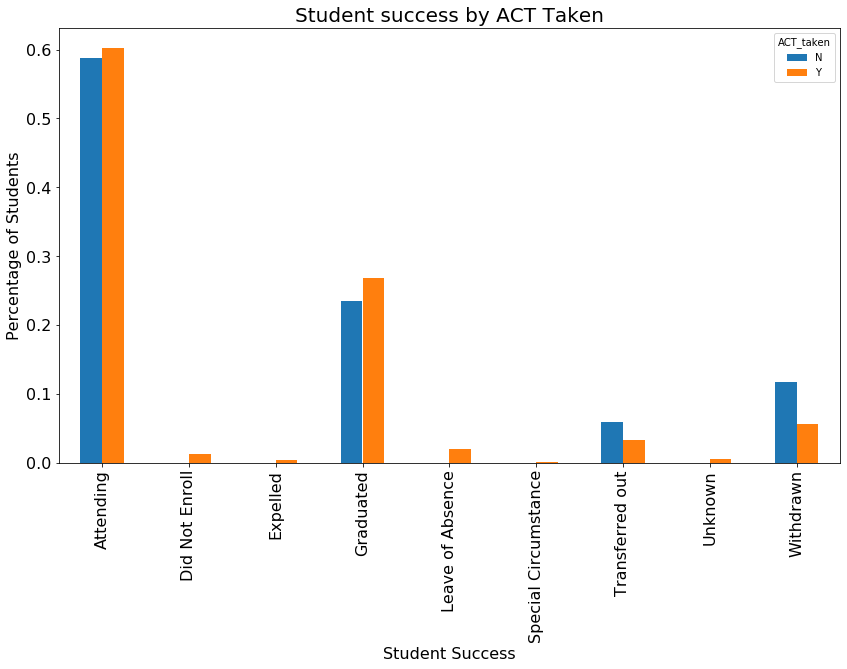

In [71]:
index = ['Attending','Did Not Enroll','Expelled','Graduated','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']
relationship_index = pd.crosstab(index=Master_success_df1['Enrollment: Status'], columns=Master_success_df1.ACT_taken)
#romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index = perc(relationship_index).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Student success by ACT Taken', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Student Success', fontsize=16)
plt.savefig('Student_success_by_ACT_taken.png', bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'ACT Taken  Distribution')

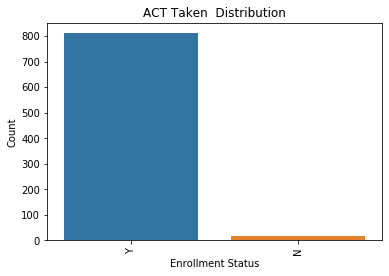

In [72]:
f, ax = plt.subplots()

figure = sns.countplot(x = 'ACT_taken', data = Master_success_df1)
ax = ax.set(ylabel="Count", xlabel="Enrollment Status")
figure.grid(False)
figure.set_xticklabels(figure.get_xticklabels(), rotation=90)
plt.title('ACT Taken  Distribution')
#plt.savefig('enrollment_status.png', bbox_inches='tight')

In [73]:
pd.crosstab(index=Master_success_df1['Enrollment: Status'], columns=Master_success_df1.ACT_taken)

ACT_taken,N,Y
Enrollment: Status,,
Attending,10,488
Did Not Enroll,0,10
Expelled,0,3
Graduated,4,217
Leave of Absence,0,16
Special Circumstance,0,1
Transferred out,1,26
Unknown,0,4
Withdrawn,2,46


In [74]:
relationship_index.apply(perc ,axis =1)

ACT_taken,N,Y
Enrollment: Status,,
Attending,0.020080,0.979920
Did Not Enroll,0.000000,1.000000
Expelled,0.000000,1.000000
Graduated,0.018100,0.981900
Leave of Absence,0.000000,1.000000
Special Circumstance,0.000000,1.000000
Transferred out,0.037037,0.962963
Unknown,0.000000,1.000000
Withdrawn,0.041667,0.958333


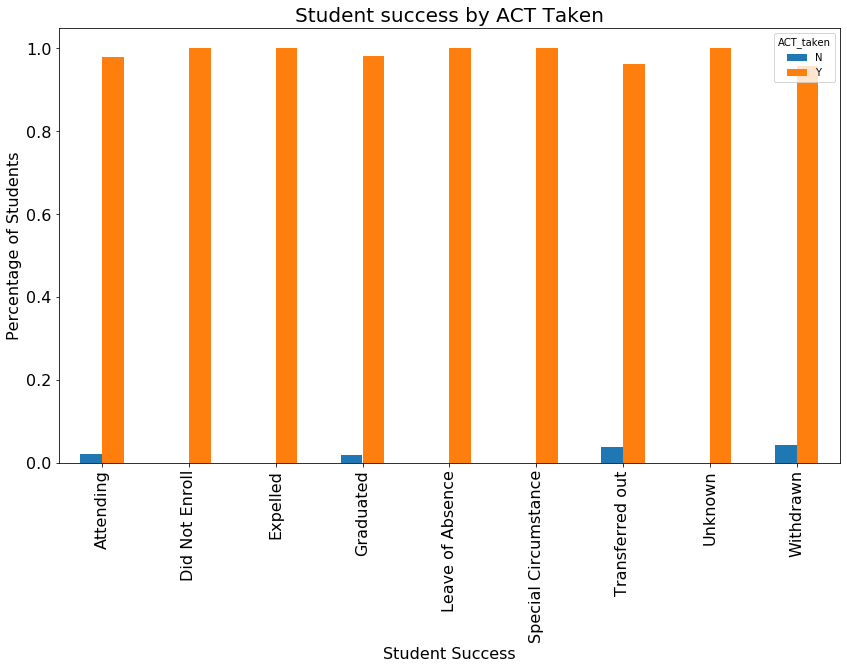

In [75]:
index = ['Attending','Did Not Enroll','Expelled','Graduated','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']
relationship_index = pd.crosstab(index=Master_success_df1['Enrollment: Status'], columns=Master_success_df1.ACT_taken)
romantic_index = relationship_index.apply(perc,axis =1).reindex(index)
#romantic_index = perc(relationship_index).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Student success by ACT Taken', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Student Success', fontsize=16)
plt.savefig('Student_success_by_ACT_taken.png', bbox_inches='tight')
plt.show()

# Above plot gives percent of students who have taken ACT and not taken ACT for each success status.

In [76]:
display(Master_success_df1)

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,Years_Enrolled,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,7,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good
4,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,...,7,003C000001mmOWjIAM,18.0,23.0,19.0,19.0,20.0,2018-04-15,Y,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
851,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
852,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory
853,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,8,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory


In [77]:

Master_success_df1.to_csv(DATA_PATH+'/features.csv', index=False)

In [78]:

Attendance_Data_1 = pd.read_excel(DATA_PATH + "/Attendance/2019-20 All Schools Absenteeism 3.13.2020_BAIN.xlsx").set_index('student.studentNumber')
Attendance_Data_2 = pd.read_excel(DATA_PATH + "/Attendance/Historical Chronic Absenteeism for APS.xlsx").drop(Attendance_Data_1.index, errors='ignore', axis=0)
#Combined_Data = Demographic_Data.merge(Attendance_Data_1, on='student.studentNumber', how='left').merge(Attendance_Data_2, on='student.studentNumber', how='left')
#Combined_Data.drop_duplicates(subset=['student.studentNumber'])
#print (len(Combined_Data['student.studentNumber'].unique()))

#Combined_Data = Combined_Data.groupby('student.studentNumber')['Percent in Attendance'].mean()
#display (Combined_Data)

In [82]:
master_df2 = Master_success_df1.merge(Attendance_Data_2, on = 'student.studentNumber')
display(master_df2)

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,ACT_taken,ACT_per,student.firstName,student.lastName,student.startDate,student.endDate,membership.totalmembershipDays,admada.attendanceDays,sch.name,cal.endYear
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,Y,Good,NaN,NaN,2014-08-04,NaT,179,162.85,KIPP Atlanta Collegiate Charter School,2015
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,Y,Good,NaN,NaN,2015-08-03,NaT,181,171.29,KIPP Atlanta Collegiate Charter School,2016
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,Y,Good,NaN,NaN,2016-08-01,NaT,181,164.47,KIPP Atlanta Collegiate Charter School,2017
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,Y,Good,NaN,NaN,2017-07-31,2018-05-25,175,159.96,KIPP Atlanta Collegiate Charter School,2018
4,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,Y,Good,NaN,NaN,2014-08-04,NaT,179,162.85,KIPP Atlanta Collegiate Charter School,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,Y,Satisfactory,NaN,NaN,2014-08-04,NaT,179,177.86,KIPP Atlanta Collegiate Charter School,2015
2756,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,Y,Satisfactory,NaN,NaN,2015-08-03,NaT,181,173.85,KIPP Atlanta Collegiate Charter School,2016
2757,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,Y,Satisfactory,NaN,NaN,2016-08-01,NaT,181,175.03,KIPP Atlanta Collegiate Charter School,2017
2758,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,Y,Satisfactory,NaN,NaN,2017-07-31,2018-05-25,175,155.22,KIPP Atlanta Collegiate Charter School,2018


In [83]:
print (master_df2['admada.attendanceDays'].isna().sum())

0


In [84]:
Attendance_Data_2['percent_abc'] = (Attendance_Data_2['admada.attendanceDays'])/ Attendance_Data_2['membership.totalmembershipDays']

In [85]:
display(Attendance_Data_2)

,student.studentNumber,student.firstName,student.lastName,student.startDate,student.endDate,membership.totalmembershipDays,admada.attendanceDays,sch.name,cal.endYear,percent_abc
0,2013142,NaN,NaN,2014-08-04,NaT,179,160.14,KIPP Vision Charter School,2015,0.894637
1,2013142,NaN,NaN,2015-07-27,NaT,181,164.22,KIPP Vision Charter School,2016,0.907293
2,2013142,NaN,NaN,2016-08-01,NaT,182,171.29,KIPP Vision Charter School,2017,0.941154
3,2013142,NaN,NaN,2017-07-31,NaT,174,173.00,KIPP Vision Charter School,2018,0.994253
4,2013142,NaN,NaN,2018-07-30,NaT,177,162.32,KIPP Atlanta Collegiate Charter School,2019,0.917062
...,...,...,...,...,...,...,...,...,...,...
15296,2035731,NaN,NaN,2017-07-31,2017-08-21,16,9.00,KIPP STRIVE Charter School,2018,0.562500
15297,1040079,NaN,NaN,2014-08-04,2014-10-16,47,40.14,KIPP Vision Charter School,2015,0.854043
15298,1041618,NaN,NaN,2014-08-04,NaT,179,169.19,KIPP Atlanta Collegiate Charter School,2015,0.945196
15299,1041618,NaN,NaN,2015-08-03,NaT,181,155.03,KIPP Atlanta Collegiate Charter School,2016,0.856519


In [86]:
print (Attendance_Data_2['percent_abc'].isna().sum())

0


In [87]:
att_df = Attendance_Data_2[['student.studentNumber','percent_abc']]
att_df1 = att_df.groupby('student.studentNumber')['percent_abc'].mean()
display(att_df1)

student.studentNumber
87044      0.910565
89581      0.861117
89882      0.956744
89889      0.942003
89901      0.903017
             ...   
2113800    0.707586
2114205    0.884615
2114208    0.931818
2114216    0.909091
2123231    0.910679
Name: percent_abc, Length: 5860, dtype: float64

In [88]:
master_df2 = Master_success_df1.merge(att_df1, on = 'student.studentNumber')
display(master_df2)

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per,percent_abc
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
4,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,...,003C000001mmOWjIAM,18.0,23.0,19.0,19.0,20.0,2018-04-15,Y,Satisfactory,0.960463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory,0.952029
824,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory,0.952029
825,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory,0.952029
826,2001835,9.986032e+09,10-19-2000,F,003C000001TDe8tIAD,NaN,2018.0,Attending,The College of Wooster,NaN,...,003C000001TDe8tIAD,19.0,23.0,18.0,19.0,20.0,2017-10-01,Y,Satisfactory,0.952029


In [89]:
master_df2.to_csv(DATA_PATH+'/features1.csv', index=False)